In [32]:
#import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)
austin_df.head()

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
0,AUSTIN,2015-01-20 10:41:48,Loose Dog,ACLONAG,3.0,TRAVIS,2015-01-20 10:41:48,1305 CORIANDER DR AUSTIN TX,78741.0,2015-01-27 12:51:06,...,ML18,Animal Services Office,Phone,3131141.68710771,1.005532e+07,Duplicate (closed),2015-01-20 10:41:48,CORIANDER,1305.0,15-00012439
1,AUSTIN,2016-06-01 10:58:13,Loose Dog,ACLONAG,7.0,TRAVIS,2016-05-22 10:00:49,3104 STONEWAY DR AUSTIN TX 78757,78757.0,2016-06-01 09:58:30,...,MJ29,Animal Services Office,Phone,3112134.24930453,1.010083e+07,Closed,2016-06-01 10:58:13,STONEWAY,3104.0,16-00123310
2,AUSTIN,2014-01-06 19:30:00,Loose Animal (not dog),ACLOANIM,2.0,TRAVIS,2014-01-06 18:04:00,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,2014-01-06 18:32:00,...,MK16,Animal Services Office,Phone,3124825.4024878,1.004597e+07,Closed,2014-01-06 19:30:00,SMITH SCHOOL,4100.0,14-00003554
3,AUSTIN,2014-11-19 10:46:48,Austin Code - Request Code Officer,CODECOMP,7.0,TRAVIS,2014-11-15 15:43:41,12710 PALFREY DR AUSTIN TX 78727,78727.0,2014-11-19 10:46:48,...,ML35,Austin Code Department,Web,3124206.25,1.012812e+07,Closed,2014-11-19 10:46:48,PALFREY,12710.0,14-00247505
4,AUSTIN,2014-08-25 21:21:00,Animal - Proper Care,ACPROPER,1.0,TRAVIS,2014-07-28 17:33:00,6703 TULANE DR AUSTIN TX,78723.0,2014-08-25 20:23:00,...,MM26,Animal Services Office,Phone,3137129.998,1.008721e+07,Closed,2014-08-25 21:21:00,TULANE,6703.0,14-00156342


In [34]:
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [35]:
austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
                                      "created_date":"Date", "owning_department":"Department",
                                      "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
austin_df.head(10)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [36]:
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [37]:
austin_df.replace('', np.nan, inplace=True)
austin_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [38]:
austin_df.count()

City                     454982
County                   452747
Incident Zip             454963
Date                     452741
Department               459305
Complaint Description    459305
Type of Complaint        459305
dtype: int64

In [39]:
cleanaustin_df = austin_df.dropna(how="any")
cleanaustin_df.count()

City                     445845
County                   445845
Incident Zip             445845
Date                     445845
Department               445845
Complaint Description    445845
Type of Complaint        445845
dtype: int64

In [40]:
cleanaustin_df.head(20)

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [41]:
cleanaustin_df['City'].value_counts()

AUSTIN              434876
PFLUGERVILLE          2072
DEL VALLE             1747
AUSTIN 5 ETJ          1204
MANOR                 1088
Austin                 538
austin                 498
CEDAR PARK             437
OTHER                  365
LEANDER                294
ROUND ROCK             252
BEE CAVE               234
WEST LAKE HILLS        232
LAKEWAY                203
SUNSET VALLEY          200
MUSTANG RIDGE          183
ELGIN                  179
MANCHACA               117
TRAVIS                 111
SPICEWOOD              106
BUDA                    99
JONESTOWN               92
LAGO VISTA              90
CREEDMOOR               76
ROLLINGWOOD             75
WEBBERVILLE             72
BRIARCLIFF              58
DRIPPING SPRINGS        46
CEDAR CREEK             34
COUPLAND                33
                     ...  
austi                    2
BEAR CREEK               2
Austin.                  2
SAN MARCOS               2
Aus                      2
AUstin                   2
l

In [42]:
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.City.isin(value_list)]

In [43]:
austincity_df['City'].value_counts()

AUSTIN    434876
Austin       538
austin       498
Name: City, dtype: int64

In [44]:
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.County.isin(value_list)]

In [45]:
austin311_df.count()

City                     422852
County                   422852
Incident Zip             422852
Date                     422852
Department               422852
Complaint Description    422852
Type of Complaint        422852
dtype: int64

In [46]:
austin311_df["Incident Zip"] = austin311_df["Incident Zip"].astype(int)

/Users/Bopanna/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
austin311_df.head()

,City,County,Incident Zip,Date,Department,Complaint Description,Type of Complaint
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [48]:
austin311_df.to_csv("clean_austin_311.csv")

### Begin Bopanna's code
Analysis by Zipcode

In [49]:
#number of zipcodes in dataframe
austin311_df["Incident Zip"].nunique()

56

In [50]:
#find complaint count by zipcode
complaint_count = pd.DataFrame(austin311_df["Incident Zip"].value_counts())
complaint_count = complaint_count.reset_index()
complaint_count = complaint_count.rename(columns = {"Incident Zip":"complaint count","index":"zip_code" })
complaint_count.head()

,zip_code,complaint count
0,78745,31381
1,78704,29674
2,78702,25203
3,78744,22108
4,78758,21741


In [51]:
complaint_count.to_csv("zipcode_complaints.csv")

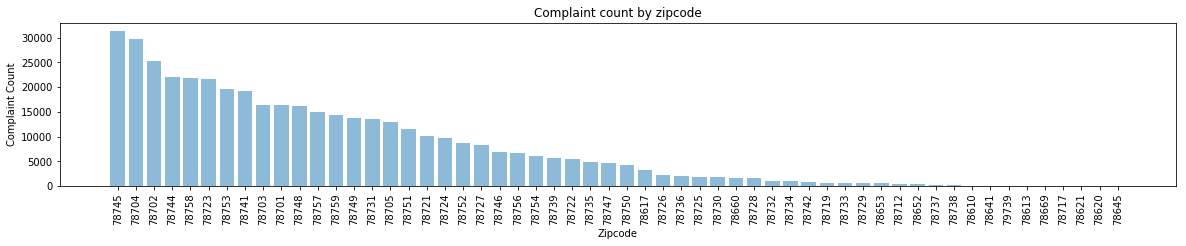

In [52]:
#plot complaint count by zipcode

# Create the ticks for our bar chart's x axis
plt.figure(figsize=(20,3))
x_axis = np.arange(len(complaint_count["zip_code"]))
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, complaint_count["zip_code"], rotation="vertical")

plt.bar(x_axis, complaint_count["complaint count"], alpha=0.5, align="edge")

plt.xlabel("Zipcode")
plt.ylabel("Complaint Count")
plt.title("Complaint count by zipcode")

plt.show()

In [53]:
#create austin crime df
crime_df = pd.read_csv('2016_Annual_Crime_Data.csv',low_memory=False)
crime_df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,201611018.0,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN


In [54]:
#clean-up data
crime_df = crime_df.dropna(how="any")
crime_df.count()

GO Primary Key                           34885
Council District                         34885
GO Highest Offense Desc                  34885
Highest NIBRS/UCR Offense Description    34885
GO Report Date                           34885
GO Location                              34885
Clearance Status                         34885
Clearance Date                           34885
GO District                              34885
GO Location Zip                          34885
GO Census Tract                          34885
GO X Coordinate                          34885
GO Y Coordinate                          34885
dtype: int64

In [55]:
#dataframe with crime by zipcodes
crime_df = pd.DataFrame(crime_df["GO Location Zip"].value_counts())
crime_df = crime_df.reset_index()
crime_df = crime_df.rename(columns = {"GO Location Zip":"crime reports","index":"zip_code" })
crime_df.head()

,zip_code,crime reports
0,78741.0,3121
1,78753.0,2904
2,78704.0,2380
3,78758.0,2281
4,78745.0,2108


In [56]:
#merge tables
merge_df = pd.merge(complaint_count, crime_df, on = "zip_code", how = "outer")
merge_df.head()

,zip_code,complaint count,crime reports
0,78745,31381,2108.0
1,78704,29674,2380.0
2,78702,25203,1497.0
3,78744,22108,1807.0
4,78758,21741,2281.0


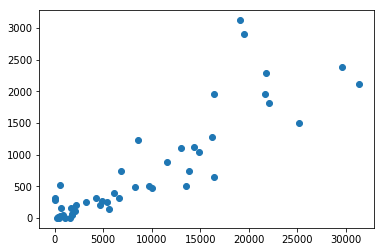

In [57]:
#create scatter plot
plt.scatter (merge_df["complaint count"], merge_df["crime reports"])
plt.show()

In [58]:
#create austin crime df
df_2014 = pd.read_csv('2014_Housing_Market_Analysis_Data_by_Zip_Code.csv',low_memory=False)
df_2014.head()

,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Rental units affordable to average teacher,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related
0,78726.0,9%,$66096,16%,20%,3%,4%,2%,0%,1%,...,70%,0%,99%,17%,375%,20%,55%,2%,$786,40%
1,NaN,19%,$52431,16%,35%,8%,7%,8%,24%,10%,...,74%,22%,98%,58%,65%,31%,74%,29%,$668,38%
2,78724.0,38%,$35711,29%,63%,8%,8%,28%,85%,16%,...,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%
3,78617.0,18%,$43957,12%,67%,10%,15%,23%,NaN,11%,...,63%,NaN,99%,NaN,101%,74%,21%,16%,$865,42%
4,78701.0,20%,$68152,16%,14%,10%,9%,0%,7%,7%,...,29%,7%,90%,30%,12%,115%,59%,97%,$433,23%


In [59]:
#clean-up data
df_2014 = df_2014.dropna(how="any")

In [60]:
df_2014_income = df_2014[["Zip Code", "Median household income"]]
df_2014_income = df_2014_income.rename(columns = {"Zip Code":"zip_code"})
df_2014_income.head()

,zip_code,Median household income
0,78726.0,$66096
2,78724.0,$35711
4,78701.0,$68152
5,78702.0,$34734
6,78703.0,$92606


In [61]:
df_2014_income["Median household income"] = df_2014_income["Median household income"].map(lambda x: x.lstrip("$"))
df_2014_income.head()

,zip_code,Median household income
0,78726.0,66096
2,78724.0,35711
4,78701.0,68152
5,78702.0,34734
6,78703.0,92606


In [62]:
#merge tables
merge2_df = pd.merge(complaint_count, df_2014_income, on = "zip_code", how = "outer")
merge2_df.head()

,zip_code,complaint count,Median household income
0,78745,31381,49243
1,78704,29674,50248
2,78702,25203,34734
3,78744,22108,41056
4,78758,21741,41792


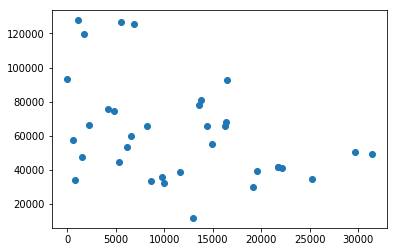

In [63]:
#create scatter plot
plt.scatter (merge2_df["complaint count"], merge2_df["Median household income"])
plt.show()